<a href="https://colab.research.google.com/github/Gottyokit/LearningAndPractice/blob/main/Another_copy_PitonaYesYesFALSEE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Valores reales:  [0.2, 0.18, 0.32, 0.3, 0.1, 0.28, 0.22, 0.12, 0.25, 0.15]
Predicciones:  [0.437628, 0.15454268, 0.4080155, 0.29206875, 0.34370434, 0.19752103, 0.17807864, 0.07184054, 0.24326894, 0.10711001]

Métricas adicionales:
Mean Absolute Error (MAE): 0.0825
Coeficiente de Determinación (R²): -1.6587


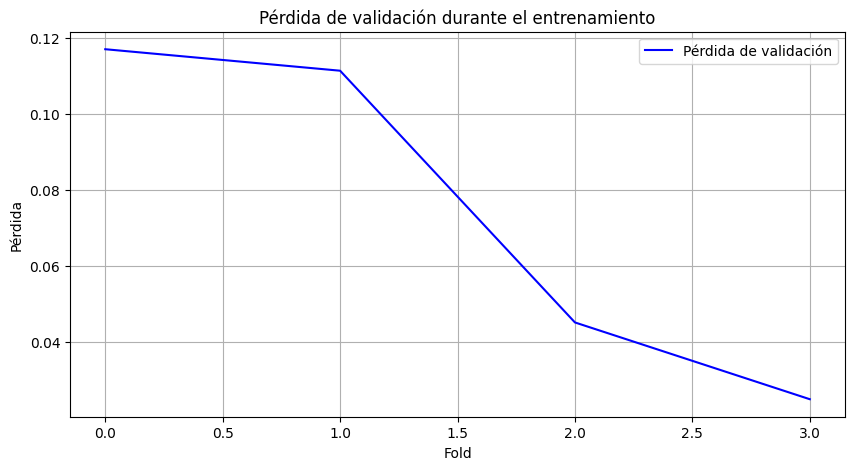

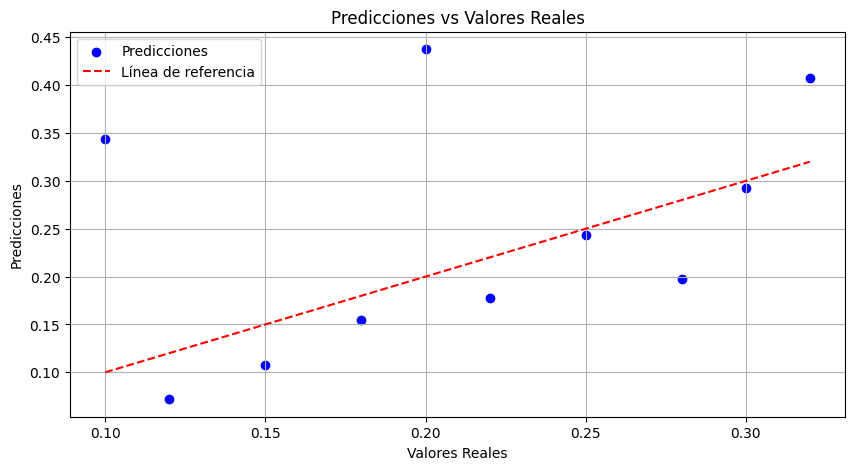

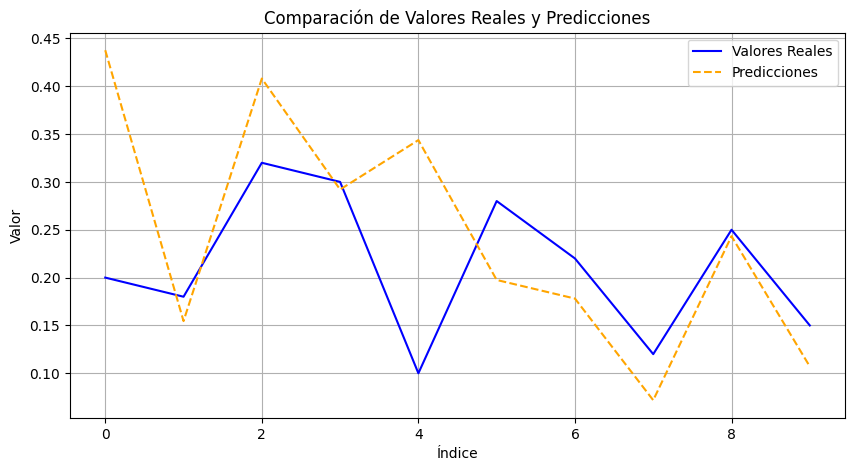

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
import numpy as np
import tensorflow as tf

# Generar más datos de entrada y objetivo (sintéticos)
X_train = [
    [27.9, 23.3, 9.54, 303.0, 4254.0, 0],
    [28.3, 26.1, 9.01, 303.0, 8191.0, 0],
    [26.6, 24.6, 9.01, 303.0, 9023.0, 4012],
    [27.2, 22.5, 8.48, 303.0, 4077.0, 0],
    [28.0, 25.0, 9.30, 303.0, 6000.0, 2000],
    [27.5, 24.0, 9.10, 303.0, 7500.0, 1500],
    [26.8, 23.5, 8.90, 303.0, 5000.0, 1000],
    [27.3, 24.8, 9.20, 303.0, 6700.0, 2500],
    [28.1, 25.6, 9.50, 303.0, 7200.0, 3000],
    [26.9, 22.7, 8.70, 303.0, 4800.0, 500]
]

y_train = [0.30, 0.20, 0.10, 0.25, 0.22, 0.18, 0.15, 0.28, 0.32, 0.12]

# Datos de prueba
X_test = [[26.6, 25.7, 9.01, 303.0, 8040.0, 3937]]
y_test = [0.15]

# Escalado de los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertir y_train a numpy array para que pueda ser indexado
y_train = np.array(y_train)

# Lista para almacenar las pérdidas y las predicciones
losses = []
predictions = []
real_values = []

# Early stopping para evitar sobreentrenamiento
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Función para crear el modelo
def create_model():
    model = Sequential()
    model.add(Input(shape=(X_train_scaled.shape[1],)))  # Usar Input en lugar de input_shape
    model.add(Dense(128, activation='relu'))  # Capa oculta con más neuronas
    model.add(Dense(64, activation='tanh'))  # Otra capa oculta
    model.add(Dense(32, activation='relu'))  # Capa adicional para mejorar la modelización
    model.add(Dense(1))  # Capa de salida
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_absolute_error')  # Cambié a MAE
    return model

# Entrenamiento con validación cruzada
kf = KFold(n_splits=4, shuffle=True, random_state=42)
for train_index, val_index in kf.split(X_train_scaled):
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Convertir datos a tensores
    X_train_fold = tf.convert_to_tensor(X_train_fold, dtype=tf.float32)
    y_train_fold = tf.convert_to_tensor(y_train_fold, dtype=tf.float32)
    X_val_fold = tf.convert_to_tensor(X_val_fold, dtype=tf.float32)
    y_val_fold = tf.convert_to_tensor(y_val_fold, dtype=tf.float32)

    # Crear y entrenar el modelo para cada fold
    model = create_model()
    history = model.fit(X_train_fold, y_train_fold, epochs=100, batch_size=8, verbose=0, validation_data=(X_val_fold, y_val_fold), callbacks=[early_stopping])

    # Evaluar el modelo y almacenar la pérdida
    loss = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    losses.append(loss)

    # Guardar las predicciones
    y_pred = model.predict(X_val_fold)
    predictions.extend(y_pred.flatten())
    real_values.extend(y_val_fold.numpy())

# Mostrar los valores reales y las predicciones
print("Valores reales: ", real_values)
print("Predicciones: ", predictions)

# Calcular métricas adicionales
mae = mean_absolute_error(real_values, predictions)
r2 = r2_score(real_values, predictions)

print(f"\nMétricas adicionales:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Coeficiente de Determinación (R²): {r2:.4f}")

# Graficar la pérdida durante el entrenamiento
plt.figure(figsize=(10, 5))
plt.plot(losses, label="Pérdida de validación", color='blue')
plt.xlabel("Fold")
plt.ylabel("Pérdida")
plt.title("Pérdida de validación durante el entrenamiento")
plt.legend()
plt.grid(True)
plt.show()

# Graficar predicciones vs valores reales
plt.figure(figsize=(10, 5))
plt.scatter(real_values, predictions, color='blue', label='Predicciones')
plt.plot([min(real_values), max(real_values)], [min(real_values), max(real_values)], color='red', linestyle='--', label='Línea de referencia')
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs Valores Reales")
plt.legend()
plt.grid(True)
plt.show()

# Gráfica de comparación entre valores reales y predicciones (línea continua)
plt.figure(figsize=(10, 5))
plt.plot(real_values, label='Valores Reales', color='blue', linestyle='-')
plt.plot(predictions, label='Predicciones', color='orange', linestyle='--')
plt.xlabel("Índice")
plt.ylabel("Valor")
plt.title("Comparación de Valores Reales y Predicciones")
plt.legend()
plt.grid(True)
plt.show()
